In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import timeit

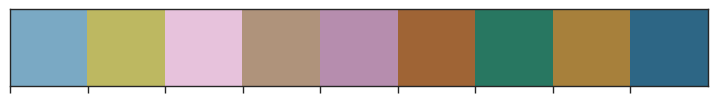

In [2]:
sns.set()
sns.set_context("paper", font_scale=1.4)
sns.set_style("ticks")

colors = sns.color_palette('colorblind', 10, desat = 0.5)
colors = colors[::-1]
colors.pop(2)

sns.set_palette(colors)

sns.palplot(colors)
plt.rcParams['axes.grid'] = True
#plt.rcParams['axes.grid.axis'] = 'y'
#plt.rcParams['axes.grid.which'] = 'major'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = 1.5
plt.rcParams['figure.figsize'] = (16, 9)
plt.rcParams['figure.dpi'] = 150
plt.style.use('seaborn-v0_8')

rc = {"font.family" : "serif", 
      "mathtext.fontset" : "stix"}
plt.rcParams.update(rc)
plt.rcParams["font.serif"] = ["Times New Roman"] + plt.rcParams["font.serif"]

# Pre exercise: *(Pseudo) Random Numbers*

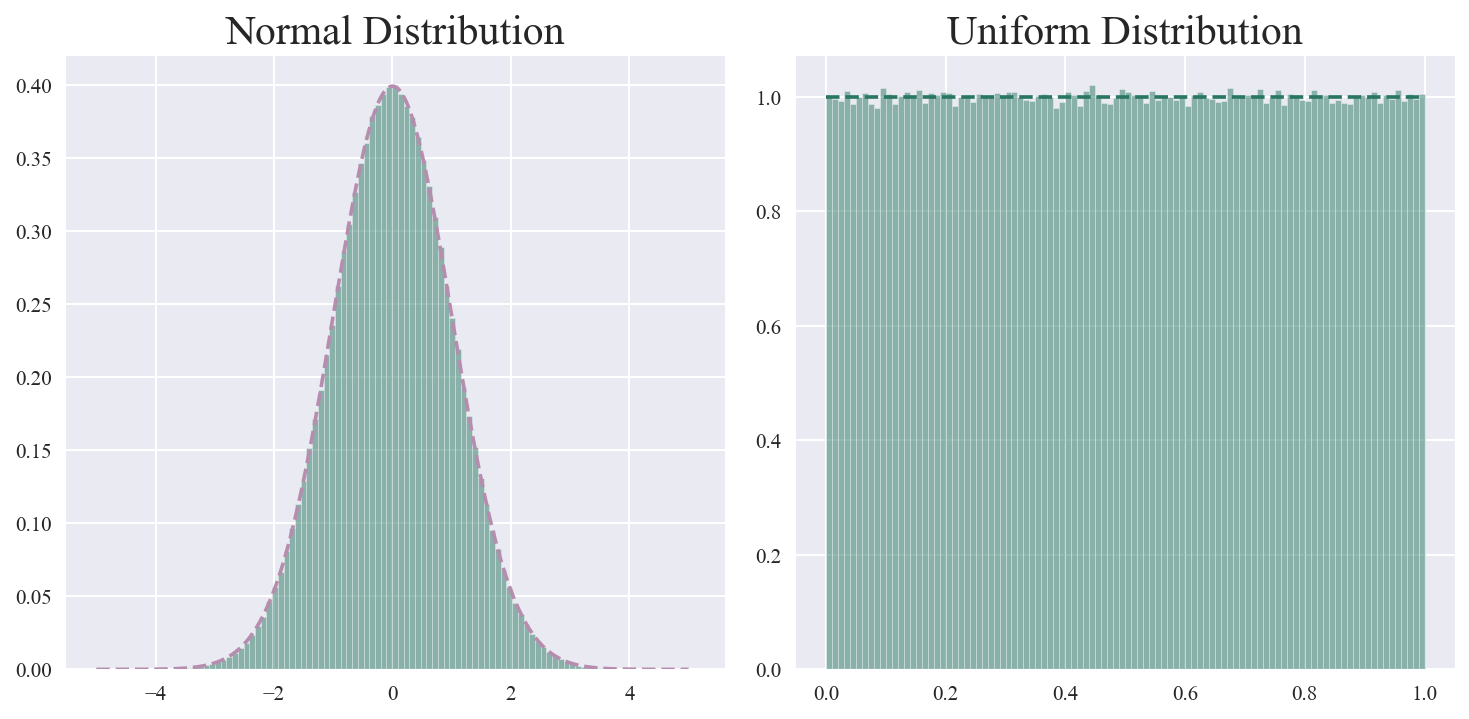

In [3]:
N = 1e6
mu = 0 
sigma = 1

x_normal = np.random.normal(0, 1, int(N))
x_uniform = np.random.uniform(0, 1, int(N))
x_plot = np.linspace(-5, 5, 1000)


def gaussian(x, mu, sigma):
    return 1/(sigma*np.sqrt(2*np.pi)) * np.exp(-0.5*((x-mu)/sigma)**2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].hist(x_normal, bins=100, density=True, color=colors[6], alpha=0.5)
ax[0].plot(x_plot, gaussian(x_plot, mu, sigma), color=colors[4], ls='--')
ax[0].set_title('Normal Distribution', fontsize=20)

ax[1].hist(x_uniform, bins=100, density=True, color=colors[6], alpha=0.5)
ax[1].hlines(1, 0, 1, color=colors[6], ls='--')
ax[1].set_title('Uniform Distribution', fontsize=20)

fig.tight_layout()

In [11]:
# Drawing 10 samples of N gaussian numbers

N_draw = 10
samples = np.random.normal(0, 1, (N_draw, int(N)))



In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 5))
for i in range(N_draw):
    ax.hist(samples[i], alpha=0.5 ,bins=100, density=True, label=f'Sample {i+1}')

ax.plot(x_plot, gaussian(x_plot, mu, sigma), color=colors[4], ls='--', label='Gaussian Distribution')
ax.legend()

fig.tight_layout()

# Exercise 1: *Classic & Simple Monte Carlo Usage*

Text(0.5, 0.92, 'Estimated Area: 84.91, Area using $\\pi$: 84.95')

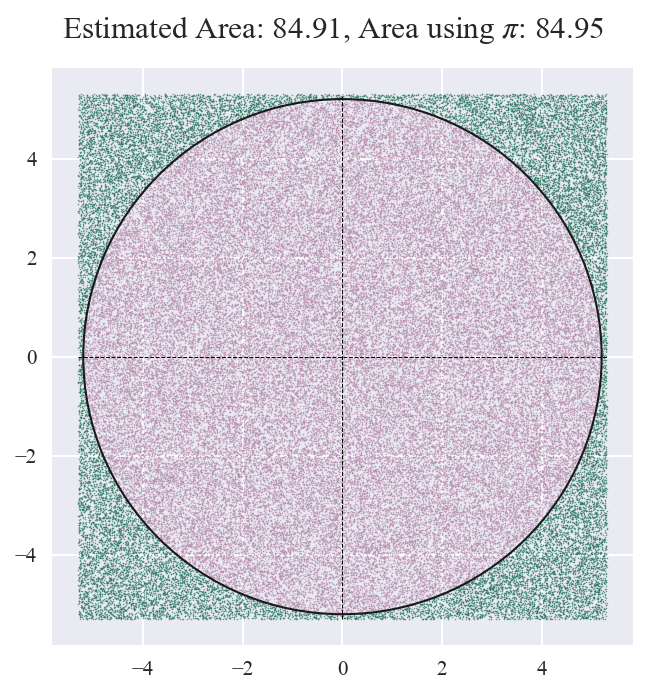

In [64]:
def circle_eq(x, y,):
    return x**2 + y**2

N = int(1e5)
radius = 5.2
small_offset = 0.1
sampling_radius = radius + small_offset

def circle_mc_sample(N, sampling_radius):
    x = np.random.uniform(-sampling_radius , sampling_radius, N)
    y = np.random.uniform(-sampling_radius, sampling_radius, N)
    inside = circle_eq(x, y) < radius**2
    outside = ~inside

    # Estimate erea of circle without knowing pi
    area_est = (2*sampling_radius)**2 * np.sum(inside) / N
    area_check = np.pi * radius**2
    # print(f'Estimated area: {area_est:.2f}, Area using pi: {area_check:.2f}')

    return (x[inside], y[inside], x[outside], y[outside], area_est, area_check)


x_accept, y_accept, x_reject, y_reject, area_est, area_check = circle_mc_sample(N, sampling_radius)

fig, ax = plt.subplots(1, 1, figsize=(5, 5), dpi=150)
ax.scatter(x_accept, y_accept, color=colors[4], label='Accept', marker='.', s=1, alpha=0.5)
ax.scatter(x_reject, y_reject, color=colors[6], label='Reject', marker='.', s=1, alpha = 0.5)
ax.hlines(0, -sampling_radius, sampling_radius, linewidth=0.5, color='black', ls='--', label='Sampling interval x')
ax.vlines(0, -sampling_radius, sampling_radius, linewidth=0.5, color='black', ls='--', label='Sampling interval y')

# Draw circle
circle = plt.Circle((0, 0), radius, color='k', fill=False, linewidth=1)
ax.add_artist(circle)
fig.text(0.5, 0.92, f'Estimated Area: {area_est:.2f}, Area using $\pi$: {area_check:.2f}', ha='center', fontsize=15)


# Excersise 2: *1000 Monte Carlo runs*

<function matplotlib.pyplot.hist(x: 'ArrayLike | Sequence[ArrayLike]', bins: 'int | Sequence[float] | str | None' = None, range: 'tuple[float, float] | None' = None, density: 'bool' = False, weights: 'ArrayLike | None' = None, cumulative: 'bool | float' = False, bottom: 'ArrayLike | float | None' = None, histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar', align: "Literal['left', 'mid', 'right']" = 'mid', orientation: "Literal['vertical', 'horizontal']" = 'vertical', rwidth: 'float | None' = None, log: 'bool' = False, color: 'ColorType | Sequence[ColorType] | None' = None, label: 'str | Sequence[str] | None' = None, stacked: 'bool' = False, *, data=None, **kwargs) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'>

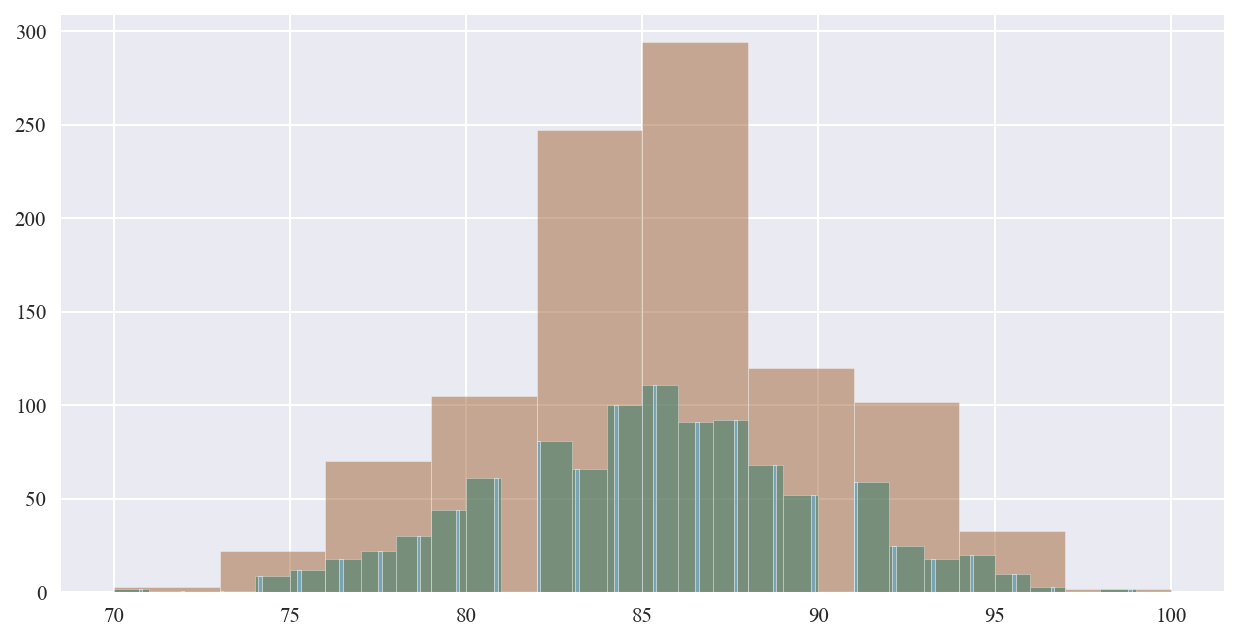

In [86]:
N_trials = 1000
N = 100
sampling_raius = 5.2 # 0.2 larger than the circle


est_area_list = []
for i in range(N_trials):
    x_accept, y_accept, _, _, area_est, _ = circle_mc_sample(N, sampling_radius)
    est_area_list.append(area_est)

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)

hist_range = (70, 100)
ax.hist(est_area_list, range=hist_range, bins=10, color=colors[5], alpha=0.5, density=False)   # 3 meter binwidth
ax.hist(est_area_list, range=hist_range, bins=30, color=colors[6], alpha=0.5, density=False)   # 1 meter binwidth
ax.hist(est_area_list, range=hist_range, bins=300, color=colors[0], alpha=0.8, density=False)  # 0.1 meter binwidth


plt.hist

# Exercise 3: *Precision of Pi*

Pi estimate after 10 samples: 3.32426
Pi estimate after 20 samples: 3.11649
Pi estimate after 30 samples: 3.46277
Pi estimate after 40 samples: 3.53203
Pi estimate after 50 samples: 3.57358
Pi estimate after 60 samples: 3.53203
Pi estimate after 70 samples: 3.56171
Pi estimate after 80 samples: 3.53203
Pi estimate after 90 samples: 3.46277
Pi estimate after 100 samples: 3.40737
Pi estimate after 110 samples: 3.39981
Pi estimate after 120 samples: 3.35889
Pi estimate after 130 samples: 3.32426
Pi estimate after 140 samples: 3.35394
Pi estimate after 150 samples: 3.32426
Pi estimate after 160 samples: 3.35023
Pi estimate after 170 samples: 3.32426
Pi estimate after 180 samples: 3.32426
Pi estimate after 190 samples: 3.28052
Pi estimate after 200 samples: 3.28271
Pi estimate after 210 samples: 3.28469
Pi estimate after 220 samples: 3.26760
Pi estimate after 230 samples: 3.27006
Pi estimate after 240 samples: 3.30695
Pi estimate after 250 samples: 3.34088
Pi estimate after 260 samples: 3.3

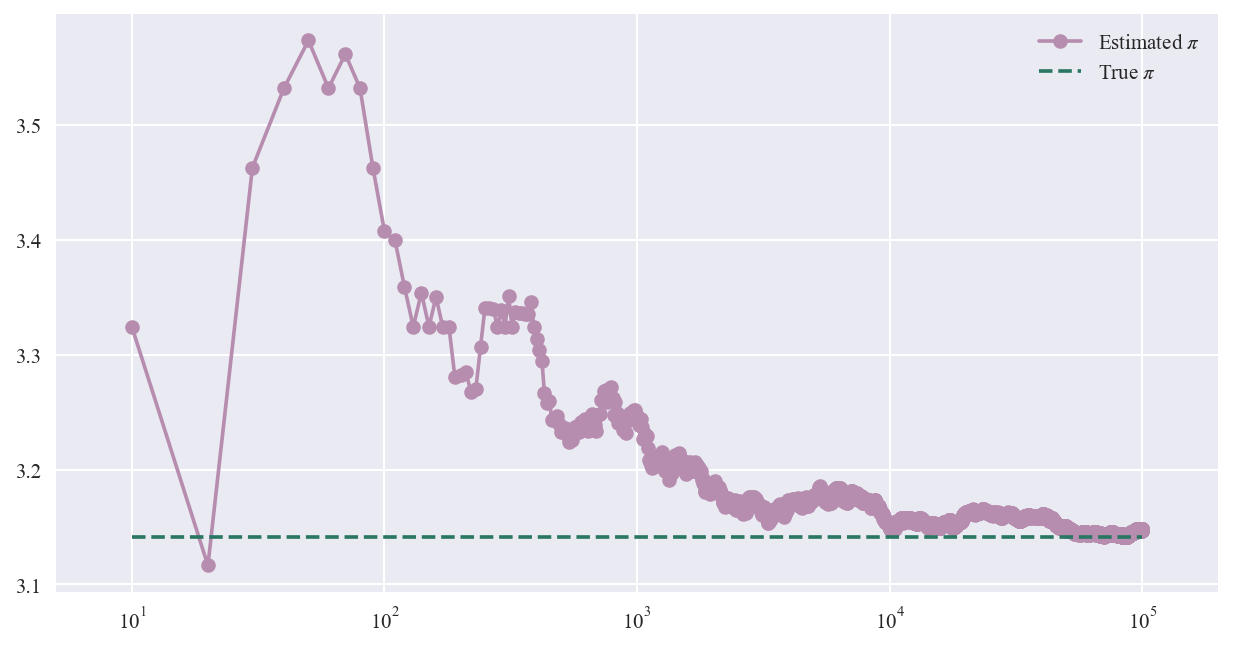

In [111]:
def pi_prec(N_throws, sampling_radius):

    n_throw = 0
    inside = []
    pi_list = []
    while n_throw < N_throws[-1]:
        x = np.random.uniform(-sampling_radius, sampling_radius)
        y = np.random.uniform(-sampling_radius, sampling_radius)

        if circle_eq(x, y) < radius**2:
            inside.append(True)
        else:
            inside.append(False)

        n_throw += 1

        if n_throw in N_throws:
            area_est = (2*sampling_radius)**2 * np.sum(inside) / n_throw
            pi_est = area_est / radius**2
            pi_list.append(pi_est)

    return pi_list


N_throws = np.arange(10, 1e5, 10).astype(int)
pi_list = pi_prec(N_throws, sampling_radius)

for i, pi in enumerate(pi_list):
    print(f'Pi estimate after {N_throws[i]} samples: {pi:.5f}')

fig, ax = plt.subplots(1, 1, figsize=(10, 5), dpi=150)
ax.plot(N_throws, pi_list, marker='o', color=colors[4], label='Estimated $\pi$')
ax.set_xscale('log')
ax.hlines(np.pi, N_throws[0], N_throws[-1], color=colors[6], ls='--', label='True $\pi$')
ax.set(xlim=(N_throws[0]-5, N_throws[-1]+1e5))
ax.legend()
